# De-Embedding Parasitics

Removing or de-embedding the effect of parasitic components of the SSM is an important step for the extraction of intrinsic parameters. Below we describe the typical de-embedding procedure found in literature as well as  how the $\textbf{ssm}$ module can be used to de-embed parasitic from measured $S-$parameters, examples and plots are shown and discussed. 

<img src="..\Figures_SSM\DeEmbedding_Parasitics\SSM_16_and_22_elements.jpg" alt="Image" style="max-width:850px;">
Fig. 4. A 16-element SSM (a) and 20-element SSM (b). The 20-element small signal model includes additional parasitic capacitances generated by the gate-source ($C_{pgi}$), drain-source ($C_{pdi}$) and gate-drain ($C_{gdi}$) metals as well as the stray capacitance $C_{pgd}$ generated by the gate and drain RF pads. 

Fig. 4 shows the 16-element and 20-element small signal models, respectively. The 20-element model includes aditional parasitic capacitances generated between the gate, drain and source fingers. The parasitics  $C_{pdi}$, $C_{gdi}$ are typically small and neglected in most SSM [1]; this affects intrinsic $C_{gd}$ which will be overestimated by an equivalent amount, however, this will not affect the overal match between the model and measured $S-$parematers.
The de-embedding procedure for removing the parasitics is similar irrespective of the complexity of the SSM. The procedure is described by the following schematic:

<img src="..\Figures_SSM\DeEmbedding_Parasitics\de_embedding.jpg" alt="Image" style="max-width:850px;">


Once the parasitics have been removed we get access to the intrinsic device. Working with $Y-$parameters of the intrinsic model is easier due to $\pi$-topology of the model and the presence of the voltage controlled current source. The $Y_{int}$ is described in terms of device parameters in "Instrinsic Models and Papameter Extraction"(create a link to section).

If the more complex 20-element model is used then parasitic admittance, $Y_{pc}$ has to be modified to include the device-finger parasitics as:

<div style="font-size:14pt;">    
$$
Y_{pc} = j\omega
\begin{bmatrix}
 (C_{pg} + C_{pgi}) &  ( C_{pgd} + C_{gdi} ) \\
( C_{pgd} + C_{gdi} ) &  (C_{pd} + C_{pdi})
\end{bmatrix}
$$

        
</div>

<span style="font-family:'Times New Roman'">
<div style="font-size:13pt;">
The effect of de-embeding the parasitics on $S-$parameters will be ilustrated with the following example.    
</div>

In [1]:
import numpy as np
import skrf as rf              # Import scikit rf module, we need this to import the measured S-pars     
import ssm                     # This module will allows as to get the de-embedded  Y and S-parameters 
                               # in a scikit rf Network() format.
    
    
import os                      # this will be used to get the file names, in specified folders, automatically 
from   pathlib import Path     # adding this only for development, should be removed in the final version 
home      = str(Path.home())   # this is a convinent if multiple people share the same folder, should be removed in final version
"""
# Define file location for S-parameter Data
fl_loc    = fr"{home}\Box\SSM_Summer2023\For_githab_descriptions\De-Embedding\data"
# Import the file names in fl_loc 
fl_nms    = os.listdir(fl_loc)
# Create a file path for the above file names
fl_pth    = [fl_loc + fr"\{x}" for x in fl_nms]
"""

ModuleNotFoundError: No module named 'ssm'

We can now import the $S-$ parameter data in a scikit- rf Network format.

In [2]:
ntw_ms    = [rf.Network(x) for x in fl_pth] 

In [3]:
ntw_ms   # check our network. Below you can see details about the S-aprameter measurements.

[2-Port Network: 'vds_0p6_vgs_50mV_igs_ua_ids_10p5ma',  100000000.0-12000000000.0 Hz, 120 pts, z0=[50.+0.j 50.+0.j]]

In order to remove the parasitics from the above $S-$parameters we first have to define the parasitic $Y_{pc}$ and $Z_{p}$ matrices. This can be easily done with the $\textbf{ssm}$ module and its subclasses $pZ$ and $pY$, as we will show below but first lets define the parasitics:

In [4]:
############################# Note : some of these values were extracted following procedure described 
#############################        in parasitic capacitance, inductances and resistances.
cpg       = 18.5e-15   # F
cpd       = 14.6e-15   # F
lg        = 35.5e-12   # H
ls        = 2.5e-12    # H
ld        = 37.5e-12   # H
rg        = 1.22       # Ohm
rs        = 0.8        # Ohm
rd        = 1          # Ohm

caps      = [cpg,   cpd]  # define a list for each of the parasitic cpacitances, inductances and resistances
inds      = [lg, ld, ls]
res       = [rg, rd, rs]

# define frequency, we need this for the parasitic Y and Z matrices
freq      = ntw_ms[0].f   # Hz # this allows the extraction of frequencies directly from measured S-parameter touchstone files.
                               # alternatively, you can create a numpy array with the frequency point manually.

The parasitic $Y_{pc}$ and $Z_{p}$ can be defined through  $pY$ and $pZ$, respectively. 

In [5]:
Ypc       = ssm.pY(caps, freq)
# and 
Zp        = ssm.pZ(inds, res, freq)

## We can easily gain acess to individual Y or Z parameters
## for example if we want Y11 we can simple call Ypc.Y11() this will give
## all frequency points of Y11, to save space will call ony the first 10 points
Ypc.Y11()[:10]   
## You can repeat the above for the rest of the Y-parameters as Ypc.Y12(), Ypc.Y21() and Ypc.Y22()

array([0.+1.16238928e-05j, 0.+2.32477856e-05j, 0.+3.48716785e-05j,
       0.+4.64955713e-05j, 0.+5.81194641e-05j, 0.+6.97433569e-05j,
       0.+8.13672497e-05j, 0.+9.29911425e-05j, 0.+1.04615035e-04j,
       0.+1.16238928e-04j])

In [6]:
## Similarily with Z-parameters and just for the sake of space will call only the first 10 points
Zp.Z11()[:10]

array([2.02+0.0238761j , 2.02+0.04775221j, 2.02+0.07162831j,
       2.02+0.09550442j, 2.02+0.11938052j, 2.02+0.14325663j,
       2.02+0.16713273j, 2.02+0.19100883j, 2.02+0.21488494j,
       2.02+0.23876104j])

<span style="font-family:'Times New Roman'">
<div style="font-size:13pt;">
We can now de-embed the parasitics following the procedure described previously. For simplicity, this can be done automatically with the $iY$ class of the $\textbf{ssm}$  module.
</div>

In [7]:
#intrinsic Y-parameters class
y       = ssm.iY(caps, inds, res, ntw_ms)     # iY takes all the parasitics and the data from which we want to 
                                              # remove the parasitics, then it automatically performs steps 1-7
                                              # of the de-embedding procedure. Randomly chose the last dataset from ntw_ms
        
# to get the instrinsic Y-parameters just call yi()
Intrinsic_Yparameters = y.yi()
# The above will give you (#data_sets, #frequency_points, 2,2) as you can verify with Intrinsic_Yparameters.shape
# You can get-the individual Y-parameters by calling the equivalent individual Y-parameter, Y11 for example would be
# y.y11() , below will print only the first 10 points:
y.y11()[0][:10]     # [0] to grab the 1st data-set in the list, and [:10] to show just the 10 first 10 points

array([1.02545539e-06+0.0001356j , 2.45889792e-05+0.00021412j,
       2.00037487e-05+0.0003171j , 8.69884637e-06+0.00042801j,
       2.00967240e-05+0.00052986j, 2.99563778e-05+0.00062909j,
       1.99473514e-05+0.00073608j, 2.30108118e-05+0.00085202j,
       2.72438039e-05+0.00095075j, 2.68195429e-05+0.00106198j])

In [8]:
# the instrinsic - Yparameter class allows to get the Y-parameters or S-parameters in a scikit rf Network format
ntwi   = y.ntwi()  # this contains the de-embedded S-parameters
                   # while ntw_ms contains the measured S-parameters


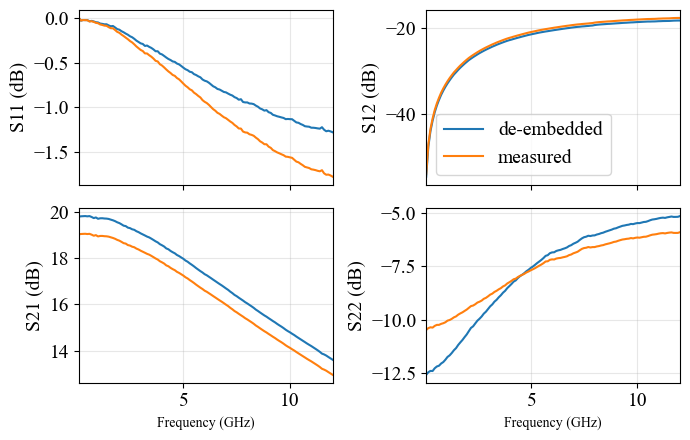

In [9]:
# we can plot the de-embedded and S-parameters and measured S-parameters using Sparameter_plots.
plot   = plts.Plot([ntwi[0], ntw_ms[0]], name=['de-embedded', 'measured']) # passing in a list of networks and a list of labels
plot.db.s()                                                                # for the data

In the above plot we can observe the effect of de-embedding parasitics on the $S-$ parameters. 
We observe that $s_{21}$ increased in magnitude at all frequencies, this can be attributed to parasitics $R_{s}$ and $R_{d}$.
The effect of these resistances are more pronounced at lower frequencies ($\sim 1$ GHz or lower), while the higher frequency dependece is affected by parasitic $C_{pg}$ (and $C_{pgi}$ if included in $Y_{pc}$). The differences in $s_{11}$ and $s_{22}$ are attributed to the removal of the input and output parasitics.

A brief description of the de-embedding procedure can be found in almost all papers on small signal modelling. A good introduction can be found in [1],[2] and [3],[4],[5].

## References


[1]. G. Kompa, Parameter extraction and complex nonlinear transistor models. in Artech House microwave library. Norwood, MA: Artech House, 2020.
$\\$
[2] G. Dambrine, A. Cappy, F. Heliodore, and E. Playez, “A new method for determining the FET small-signal equivalent circuit,” IEEE Transactions on Microwave Theory and Techniques, vol. 36, no. 7, pp. 1151–1159, Jul. 1988, doi: 10.1109/22.3650.

[3] A. Reinhard, “Ultra-Low Noise InP HEMTs for Cryogenic Applications - Fabrication, Modeling and Characterization,” ETH ZURICH, 2013.

[4] A. H. Akgiray, “New Technologies Driving Decade-Bandwidth Radio Astronomy: Quad-ridged Flared Horn and Compound-Semiconductor LNAs,” phd, California Institute of Technology, 2013. 

[5]  Y. A. Khalaf, “Systematic Optimization Technique for MESFET Modeling,” Virginia Tech, 2000.  


In [9]:
from IPython.core.display import HTML

style = """
<style>
   .rendered_html {
       font-family: 'Calibri'; /* Change font */
       font-size: 17px; /* Change font size */
   }
</style>
"""

HTML(style)